# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



# **Week 5**

## Machine Learning: Clustering and Classificaion 




### What is machine learning?

In traditional programming we mainly deal with an input and we need to explicitly write program for machine to produce a desired output but in the machine learning way of programming you will give the input and output (usually a smaller set of desired outputs) and the machine will find the right program to model output. 


That is why what we did last week was a simple example of machine learning. Fitting a polynomial(general model) by linear regression which at the end produced the desired model which 
was our polynomial with the right coefficient to be able to predict future instances. Learning from much smaller subset of possible data to predict the future instances.

### General idea:

* Take a set of examples. (training data)
* Infering some properties from the underlying model. (Model)
* Use the model found to predict future (unknow) data. (test set, new examples, ...)

Maching learning algorithm can be classified in two groups based on the available data:
* **Supervised learning:** In this set of algorithm we are dealing with a labeled dataset and we are trying to predict the label for future instances. Here we are trying to find the **conditional** probability for our variables given a set of known examples.  
* **Unsupervised learning:** In these methods of learning we usually have a data set without any label and we are trying to find an underlying patterns. In the language of probability, we are trying to find the probability density of the inputs. We want to come up with a **priori** probability distribution.

We are going to see that the **Supervised learning** is basically an **optimization** problem. 

# **Clustering:**

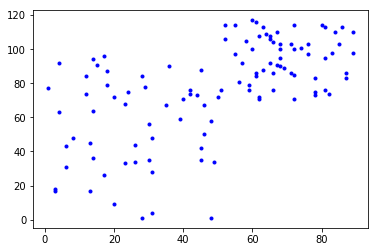

In [9]:
import numpy as np 
import random 
import matplotlib.pyplot as plt


x1 = np.random.randint(0, 50, 50)
y1 = np.random.randint(0, 100, 50)

x2 = np.random.randint(50, 90, 60)
y2 = np.random.randint(70, 120, 60)


plt.plot(x1, y1, 'b.')
plt.plot(x2, y2, 'b.')

plt.show()

Clustering is an optimization problem. But first let's define some useful concepts:

## **Variability** of a cluster: $V(c)$  
This shows how much difference exist between each element of the cluster and the mean of the cluster. 

$$
\begin{equation*}
V(c) = \sum_{x \in c} d(mean(c), x)
\end{equation*}
$$

In which $c$ is a cluster, and $d(x_0,x_1)$ is the distance between them.  [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) or even [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance) distance)


## **Dissimilirity** of the set of clusters: $D(C)$

This is a measure for a aggregate variablility of a set of clusters. And it is defined as:


$$
\begin{equation*}
D(C) = \sum_{c \in C} V(c)
\end{equation*}
$$

### Quick note on $d(x_0,x_1)$: 

Usually we define the distance between two points to be _Euclidean_. 

If we take two vectors as $X, Y \in \mathbb{R}^M$, we define the Euclidean distance to be:


$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sqrt{\sum_{i=1}^M (X_i-Y_i)^2}
\end{equation*}
$$


This is a special case for a more general class of distance definitions which are called the _Minkowski_ distance, which is defined as: 

$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sqrt[n]{\sum_{i=1}^M (X_i-Y_i)^n}
\end{equation*}
$$


Another special cases from Minkowski are the [Taxicab](https://en.wikipedia.org/wiki/Taxicab_geometry) distance (also known as Manhatan distance): 

$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sum_{i=1}^M \|X_i-Y_i\|
\end{equation*}
$$


And the [ Tchebychev](https://en.wikipedia.org/wiki/Chebyshev_distance) distance:


$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \lim_{n \to \infty}{\sqrt[n]{\sum_{i=1}^M (X_i-Y_i)^n}}
\end{equation*}
$$


As an excersice, find the equivalent representation of a circle in 2-d Euclidian geometry, for different cases of n. 

Let's write the code for Minkowski distance:

In [78]:
def Minkowski_d(x1, x2, p=2):
    # Assuming we have a list or an array of numbers
    # Creating a variable for summation
    _sum_=0
    # Now we go through every element on the arrays and
    # will find the distance and add them  
    for x1_, x2_ in zip(x1, x2):
        dummy = pow(abs(x1_-x2_), p)
        _sum_+=dummy
    distance = pow(_sum_, 1/p)
    return distance

In [77]:
Minkowski_d(np.linspace(1,100,200), np.zeros(200), 15)

118.69076563273113

### Continuing on Variability of a cluster:

Now if you look at the definition of Variablity, you see that for the special case of Euclidean distance we are just missing a factor of $1/\sqrt{k}$ in which $k$ is the number of points in a given cluster, from the definition of [variance](https://en.wikipedia.org/wiki/Variance).


_What does it mean to not include the number of points in a cluster when calculating variability?_

By doing that we are assigning **higher variability** to the **larger** cluster than the smaller cluster of the **same variance**.



You may have guessed by now, that we are trying to come up with an objective function for our optimization problem. So we can ask for a set of clusters that would minimize the dissimilarity of the clusters.

But if we put a cluster on each point, we are going to get zero dissimilarity which obviously is not a useful answer. For avoiding this we need to define a constraint; for example, we can constrain the total distance between clusters to be smaller than some value, or enforce a maximum number for clusters.



# Hierarchical Clustering:

In this method of clustering we do the following:

_Naive algorithm:_

1. Assign a cluster to each point, so $N$ clusters for $N$ points.

2. Find the most similar clusters and merge them together. Now we have $N-1$ clusters.

3. We do the second part untill we get to a cluster that contains all of the $N$ points.


This is the [Agglomerative hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering#Agglomerative_clustering_example).
 

Now we need to quantify what we mean by similarity (linkage) of two clusters.


These are **Linkage Metrics**:

1. **Single-linkage**:  It is the shortest distance between any member of one cluster and any memeber of another.


2. **Complete Linkage**: It is the greatest distance between any member of one cluster and any memeber of another.


3. **Average Linkage**: It is the average distance between any member of one cluster and any memeber of another.

This is completely deterministic for a given linkage metric.


The answer might not be optimal, since the hierarchical clustering is a **greedy algorithm**. In other words, your answer could be optimal but not globally optimal. 


However, this can become very slow and the number of calculations grows with $O(N^3)$ which can becomes useless quickly. 

_However for some linkage metrics (i.e. single-linkage), there exist $O(N^2)$ algorithms but still not very fast._

# k-means clustering:

If you know how many clusters you want then this is going to be a better choice since it is much faster. ($k$ is the number of clusters we want)

```algorithm
1. Start by randomly choosing k examples 
           as our intial centeroid. 

2. create k clusters by assiging examples 
           to closest cendroid.
           
3. Assign a new values for the centeroid: 
           The average of previous cluster configuration.
    
4. Go to (2) while centroids are changing, else break.
           We have our final configuration.
           
```  


**_Important:_** Notice that the algorithm is not deterministic and the result can change by choosing another initial configuration.

_How much time it takes to run the algorithm once before getting to the 4th line?_

For $N$ and $k$ clusters we need to find $kN$ distances. Which is much smaller than $O(N^2)$. Also, we will see that we do not need to go through many iteration to converge. (Relative to $N$)

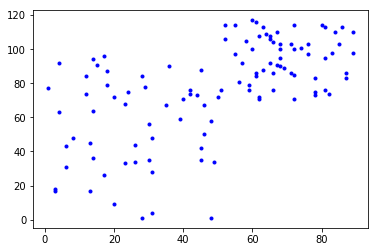

In [279]:
plt.plot(x1, y1, "b.")
plt.plot(x2, y2, "b.")

plt.show()

These are some 2-d data points and you want to find a clustering for them.

## Let's define some classes!


First class is `Point` which contains information about a given data point:

In [280]:
class Point:
    def __init__(self, features, label = None, \
                 name = "Unassigned"):
        self.name = name
        self.features = features
        self.label = label
        
    # get the dimensionality of the features
    def get_dimension(self):
        return len(self.features)
    
    def get_features(self):
        return self.features
    
    def get_label(self):
        return self.label
    
    def get_name(self):
        return self.name
    
    def distance_Minkowski(self, other, p = 2):
        return Minkowski_d(self.features, other.get_features(), p)

    def get_norm(self, p = 2):
        _zero_=[0 for _ in range(self.get_dimension())]
        return Minkowski_d(self.features, _zero_, p)
    
    def __str__(self):
        return self.name +" : "+ str(self.features) + ' : '\
               + str(self.label)

Our second class is the class of `Cluster`, which contains several data points. (`Point` objects)

In [286]:
class Cluster:
    def __init__(self, points):
        self.points = points
        self.centroid = self.find_centroid()
        
    def find_centroid(self):
        _sum_ = np.zeros(self.points[0].get_dimension())
        for point in self.points:
            _sum_+=np.array(point.get_features())
        Centroid_vec = _sum_/len(self.points)
        centroid = Point(Centroid_vec, name = "Centroid")
        return centroid
    
    def update(self, points):
        # Keep the old centroid
        previous_centroid = self.centroid
        # Update the Cluster attribiutes
        self.points = points
        self.centroid = self.find_centroid()
        return self.centroid.distance_Minkowski(previous_centroid)
    
    def variability(self, p = 2):
        _sum_distances_=0
        for point in self.points:
            _sum_distances_ += point.distance_Minkowski(self.centroid, p)
        return _sum_distances_
    
    
    def Elements(self):
        for point in points:
            yield point
            
    def __str__(self):
        names = []
        for point in self.points:
            names.append(point.get_name())
        names.sort()
        info = "Cluster Centroid: " \
               + str(self.centroid.features) +  "contains:" + "\n"
        for name in names:
            info = info + name + ", "
        return info[:-2] #remove trailing comma and space           

In [288]:
def Dissimilarity(_clusters_, p = 2):
    _tot_vari = 0
    for _clusters_ in _clusters_:
        _tot_vari += _clusters_.variability(p)
    return _tot_vari


# This is called Z-scaling
def scale_feature(_feature_):
    _f_ = np.array(_feature_)
    zero_f_ = _f_ - np.average(_f_)
    std = np.std(_f_)
    return zero_f_/std

Let's download a delivery fleet data set:
[data set](https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv)

In [300]:
data = {}

with open("data_drivers.txt", 'r') as f:
    lines = f.readlines()
    header = lines[0].split()
    
    for i, col in enumerate(header):
        x = []
        for line in lines[1:]:
            x.append(float(line.split()[i]))
            data[col] = x

In [303]:
data.keys()

dict_keys(['Driver_ID', 'Distance_Feature', 'Speeding_Feature'])

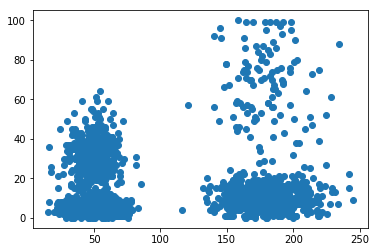

In [305]:
plt.scatter(data["Distance_Feature"], data["Speeding_Feature"])

plt.show()

In [307]:
_points_ = []

for i in range(len(data["Driver_ID"])):
    features = [data["Distance_Feature"][i], data["Speeding_Feature"][i]]
    P = Point(features, name = data["Driver_ID"][i])
    _points_.append(P)

In [318]:
def kmeans(points, k, verbose = False):
    # Get k random initial centroids, create cluster for each
    initial_centroids = random.sample(points, k)
    clusters = []
    for centroid in initial_centroids:
        clusters.append(Cluster([centroid]))
        
    #Iterate until centroids don't move
    converged = False
    number_iterations = 0
    while not converged:
        number_iterations += 1
        #Create a list containing k distinct empty lists
        new_clusters = []
        for i in range(k):
            new_clusters.append([])
            
        # Associate each example with closest centroid
        for p in points:
            # Find the closest centroid
            smallest_distance = p.distance_Minkowski(clusters[0].find_centroid())
            idi = 0
            for i in range(1, k):
                distance = p.distance_Minkowski(clusters[i].find_centroid())
                if distance < smallest_distance:
                    smallest_distance = distance
                    idi = i
            #Add p to the list of examples for appropriate cluster
            new_clusters[idi].append(p)
            
        for c in new_clusters: # Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')
        
        # Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(new_clusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(number_iterations))
            for c in clusters:
                print(c)
            print('') #add blank line
    return clusters


In [320]:
clusters = kmeans(_points_, 2)

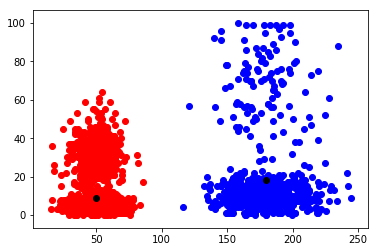

In [333]:
color = "b"
for cluster in clusters:
    for p in list(cluster.points):
        plt.scatter(p.get_features()[0], p.get_features()[1], color = color)
    color = "r"
    plt.scatter(cluster.find_centroid().get_features()[0], cluster.find_centroid().get_features()[1], color = "k")


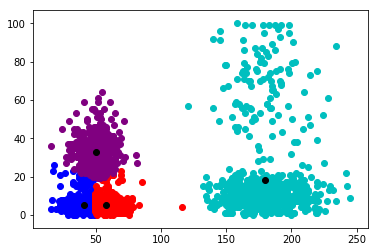

In [334]:
clusters = kmeans(_points_, 4)

colors = ["b", "r", "c", "purple"]
for i, cluster in enumerate(clusters):
    for p in list(cluster.points):
        plt.scatter(p.get_features()[0], p.get_features()[1], color = colors[i])
    plt.scatter(cluster.find_centroid().get_features()[0], cluster.find_centroid().get_features()[1], color = "k")



### How can we determine the number of clusters ($k$)?


1. Usually we use our prior knowledge about the data. 
   * There are six type of plants. $k=6$
   * There are five personality types. $k=5$
   * There are two kinds of galaxy mergers. $k=2$


2. Searching for $k$
   * We can search through different values of $k$ and find the optimal.
   * Using hierarchial clustering on subset of data

### How can we make sure that we are not using a bad initial centroid?

```algorithm
   Choose multiple sets of initial centroid at random

   Run the k-means algorithm on above initial centroids
  and find the solutions. Select the set of clusters for 
  which Dissimilarity (D(C)) would be minimized, at least
  for our set of solutions. 


```

In [271]:
_num_ = 100
_points_= []

np.random.seed(9)


for i in range(_num_):
    _p_ = Point(np.random.randint(0, 100, 2), str(i))
    _points_.append(_p_)

In [272]:
D = Cluster(_points_)

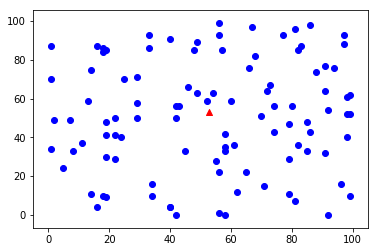

In [278]:
for point_ in _points_:
    plt.scatter(point_.features[0], point_.features[1], c = 'b')

plt.scatter(D.centroid.features[0], D.centroid.features[0], c = "r", marker="^")

plt.show()